#### **Importar librerías relevantes y consumir API de Kaggle**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = "uom190346a/sleep-health-and-lifestyle-dataset"
api.dataset_download_files(dataset, path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


#### **Descripción general de los datos.**

* ¿Qué columnas tenemos?
* ¿Qué valores toman las variables categóricas?
* ¿Existen valores nulos?
* Estadísticos de variables numéricas

In [2]:
data = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv', index_col=0)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [4]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Unique values in Gender:
['Male' 'Female']

Unique values in Occupation:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique values in BMI Category:
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique values in Blood Pressure:
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']

Unique values in Sleep Disorder:
[nan 'Sleep Apnea' 'Insomnia']


In [5]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### **Limpieza de la base de datos**

In [6]:
# Los únicos valores nulos de la columna 'Sleep Disorder' representan que no se tiene ningún desorden de sueño.
# Por lo tanto, se pueden reemplazar por "None" para indicar explícitamente la ausencia de desorden de sueño.
# Esto ayuda a mantener la consistencia de los datos y facilita el análisis posterior.

data['Sleep Disorder'] = data['Sleep Disorder'].fillna("None")

In [7]:
# Los valores de blood pressure están en el formato "systolic/diastolic". Se pueden separar en dos columnas.
# Es importante usar expand=True para que el método split expanda los resultados en dos columnas separadas.
# Sin expand=True, el resultado sería una sola columna con listas de valores.
# Convertimos a tipo int para poder realizar operaciones numéricas posteriormente.

data[['systolic_bp', 'diastolic_bp']] = (
    data['Blood Pressure']
    .str.split('/', expand=True)
    .astype(int)
    )

In [8]:
# pip install jinja2 matplotlib

data.describe().style.background_gradient(cmap='BuPu')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


#### **Análisis de datos: Correlación de las variables**

**Correlación**  
En el contexto de análisis de datos con Pandas, el método corr() utiliza por defecto la varianza muestral (n-1). Esto es lo más apropiado porque:  

Trabajamos con una muestra:  

Nuestro dataset es una muestra de una población más grande
No tenemos acceso a todos los posibles datos sobre sueño y estrés
Estimación más conservadora:  

La varianza muestral (n-1) proporciona una estimación más conservadora
Ayuda a compensar la incertidumbre de trabajar con una muestra  

La fórmula completa del coeficiente de correlación de Pearson es:

$r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(n-1)\sigma^2_X}\sqrt{(n-1)\sigma^2_Y}}$

Donde:

$Cov(X,Y)$ es la covarianza entre X e Y  
$\sigma_X$ es la desviación estándar de X  
$\sigma_Y$ es la desviación estándar de Y  
$\sigma^2_X$ es la varianza de X  
$\sigma^2_Y$ es la varianza de Y  
$n$ es el número de observaciones  

Varianzas:  
Varianza de X: $\sigma^2_X = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2$  
Varianza de Y: $\sigma^2_Y = \frac{1}{n-1}\sum_{i=1}^{n} (y_i - \bar{y})^2$  
Esta fórmula muestra explícitamente cómo la correlación es la covarianza estandarizada por las desviaciones estándar (o raíces cuadradas de las varianzas) de ambas variables.

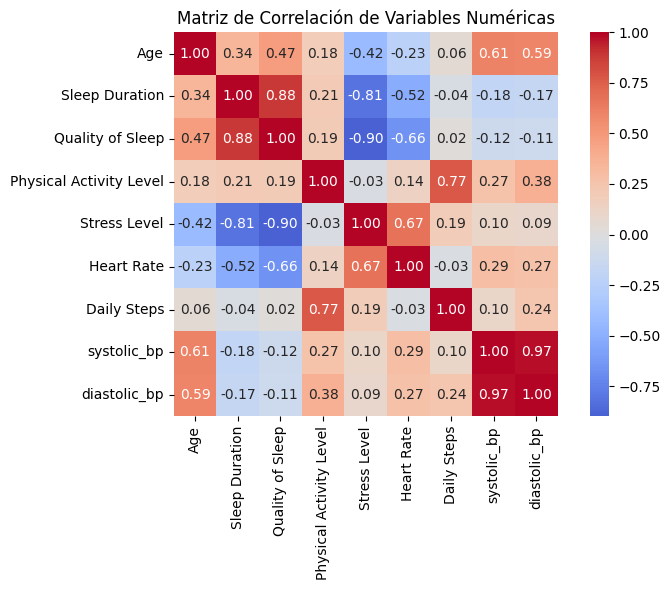

In [9]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Crear matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Crear un heatmap usando seaborn
plt.figure(figsize=(8 , 6))
sns.heatmap(correlation_matrix, 
            annot=True,          # Mostrar valores numéricos
            cmap='coolwarm',     # Esquema de colores
            center=0,            # Centro del mapa de colores
            fmt='.2f',           # Formato de números (2 decimales)
            square=True)         # Hacer las celdas cuadradas

plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

**Principales observaciones**

1. La variable Age:
    - Correlación positiva con Sleep Duration, Quality of Sleep, Physical Activity Level and Blood Pressure
    - Correlación negativa con Stress Level, Heart Rate
2. Sleep Duration y Quality of Sleep estan altamente correlacionadas
3. Sleep Duration y Quality of Sleep negativamente relacionadas con Stress Level y Heart Rate'
4. Sleep Duration y Quality of Sleep positivamente relacionadas con Physical Activity Level
5. Daily Steps solo esta relacionado positivamente con Physical Activity Level
6. Stress Level, además positivamente relacionado con Heart Rate

#### **Análisis de datos: Relación entre variables categóricas y principales variables de interés**

##### Ejemplo general de análisis. *Gender* y *Sleep Duration*

In [10]:
# 1. Análisis estadístico básico por grupo
data.groupby('Gender')['Sleep Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,185.0,7.229730,0.879434,5.8,6.5,7.2,8.1,8.5
Male,189.0,7.036508,0.693197,5.9,6.3,7.2,7.7,8.1


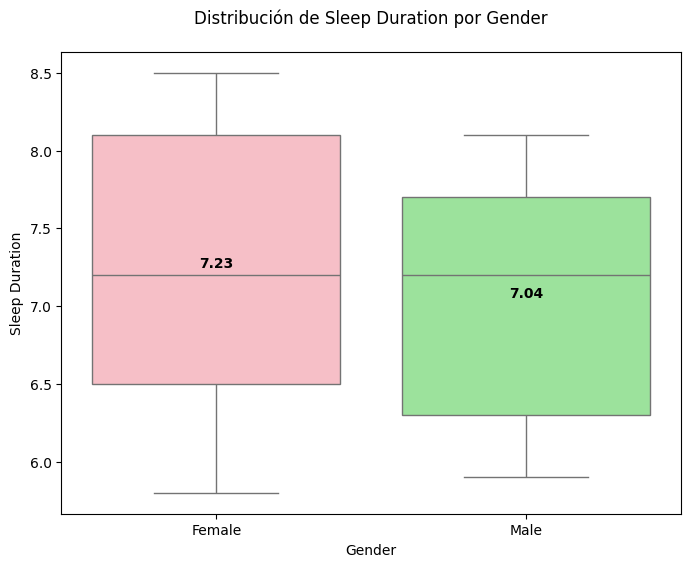

In [11]:
# 2. Visualización con boxplot
# Crear figura y ejes
plt.figure(figsize=(8, 6))

# Crear boxplot con colores personalizados y orden específico
box_plot = sns.boxplot(
    x='Gender', 
    y='Sleep Duration', 
    data=data,
    order=['Female', 'Male'],
    hue='Gender',  # Añadir hue
    palette=['lightgreen', 'lightpink'],
    legend=False
    )  # Ocultar leyenda ya que es redundante

# Calcular y añadir las medias
means = data.groupby('Gender')['Sleep Duration'].mean()
for i, (gender, mean) in enumerate(means.items()):
    box_plot.text(
        i, mean, f'{mean:.2f}', 
        horizontalalignment='center',
        verticalalignment='bottom',
        fontweight='bold'
        )

# Personalizar el gráfico
plt.title('Distribución de Sleep Duration por Gender', pad=20)

plt.show()

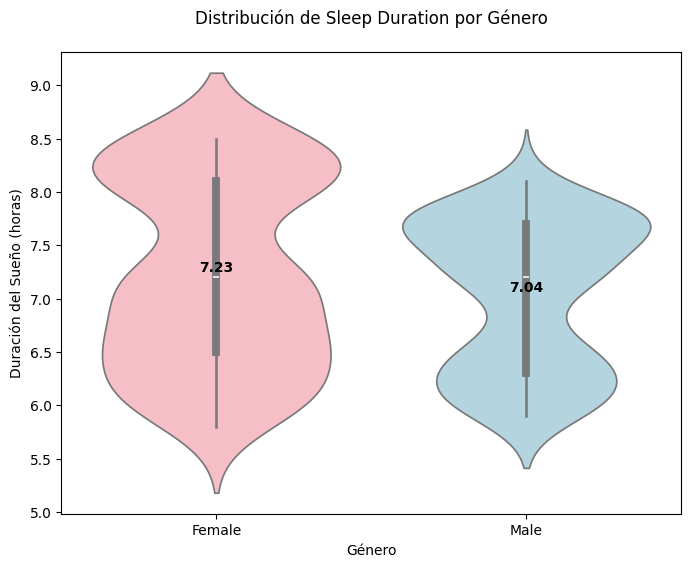

In [12]:
# 3. Visualización con violin plot para ver la distribución completa
plt.figure(figsize=(8, 6))

# Crear violin plot con colores personalizados y orden específico
violin_plot = sns.violinplot(
    x='Gender', 
    y='Sleep Duration', 
    data=data,
    order=['Female', 'Male'],
    hue='Gender',
    palette=['lightblue', 'lightpink'],
    legend=False
    )

# Calcular y añadir las medias
means = data.groupby('Gender')['Sleep Duration'].mean()
for i, (gender, mean) in enumerate(means.items()):
    violin_plot.text(i, mean, f'{mean:.2f}', 
                    horizontalalignment='center',
                    verticalalignment='bottom',
                    fontweight='bold')

# Personalizar el gráfico
plt.title('Distribución de Sleep Duration por Género', pad=20)
plt.xlabel('Género')
plt.ylabel('Duración del Sueño (horas)')

plt.show()

El t-test independiente (o test t de Student para muestras independientes) se utiliza para comparar las medias de dos grupos independientes. En este caso, se usa para determinar si existe una diferencia significativa en la duración del sueño entre hombres y mujeres.  
  
¿Por qué usar el T-Test?  
Comparación de dos grupos independientes:  

Los datos de hombres y mujeres son independientes entre sí  
Queremos comparar sus medias de duración del sueño  
Supuestos del test:  

- Normalidad: Los datos siguen una distribución normal  
- Homogeneidad de varianzas  
- Independencia de las observaciones  

Interpretación de Resultados  

t-statistic: Indica la diferencia entre grupos en unidades de error estándar  
p-value: Probabilidad de obtener resultados tan extremos si no hubiera diferencia real  
Si p < 0.05: Diferencia estadísticamente significativa  
Si p ≥ 0.05: No hay evidencia suficiente de diferencia  

In [13]:
# 4. Test estadístico (t-test para comparar medias)

male_sleep = data[data['Gender'] == 'Male']['Sleep Duration']
female_sleep = data[data['Gender'] == 'Female']['Sleep Duration']

t_stat, p_value = stats.ttest_ind(male_sleep, female_sleep)
print(f"\nResultados del t-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")


Resultados del t-test:
t-statistic: -2.3624
p-value: 0.0187


La función stats.ttest_ind() de scipy implementa la fórmula:  

$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

Donde:  

$\bar{x}_1, \bar{x}_2$ son las medias de cada grupo  
$s^2_1, s^2_2$ son las varianzas  
$n_1, n_2$ son los tamaños de muestra  
  
Por defecto, el nivel de confianza de este método es del 95%

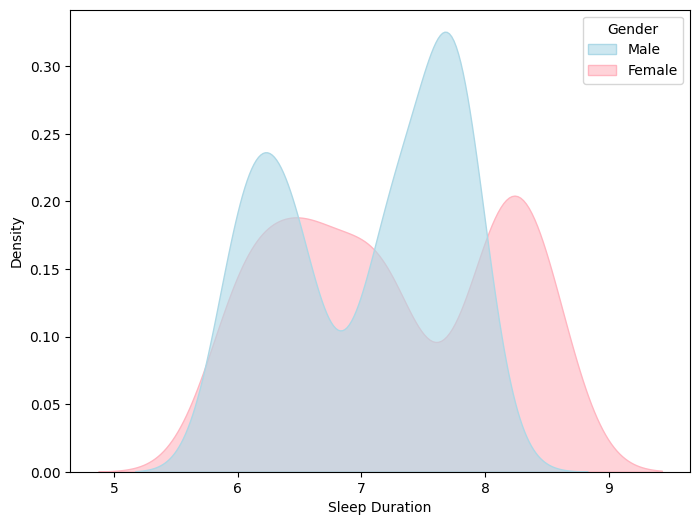

In [ ]:
# 5. Figuras de densidad superpuestas
# Crear figura
plt.figure(figsize=(8, 6))

# Crear KDE plot
sns.kdeplot(data=data, 
            x='Sleep Duration', 
            hue='Gender',
            fill=True, 
            alpha=0.6,
            palette=['lightblue', 'lightpink'])

plt.show()

##### Análisis variables categóricas

In [22]:
# 1. Descriptivas
data.groupby('Occupation')['Sleep Duration'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Occupation,,,,,,,,
Sales Representative,2.0,5.900000,0.000000,5.9,5.90,5.9,5.900,5.9
Scientist,4.0,6.000000,0.230940,5.8,5.80,6.0,6.200,6.2
Salesperson,32.0,6.403125,0.089747,6.3,6.30,6.4,6.500,6.5
Teacher,40.0,6.690000,0.226229,6.3,6.60,6.6,6.725,7.2
Software Engineer,4.0,6.750000,0.869866,5.9,6.05,6.8,7.500,7.5
Manager,1.0,6.900000,NaN,6.9,6.90,6.9,6.900,6.9
Doctor,71.0,6.970423,0.863613,6.0,6.05,7.6,7.700,8.2
Nurse,73.0,7.063014,0.990301,5.9,6.10,6.5,8.100,8.2
Accountant,37.0,7.113514,0.312838,6.5,7.10,7.2,7.200,8.0


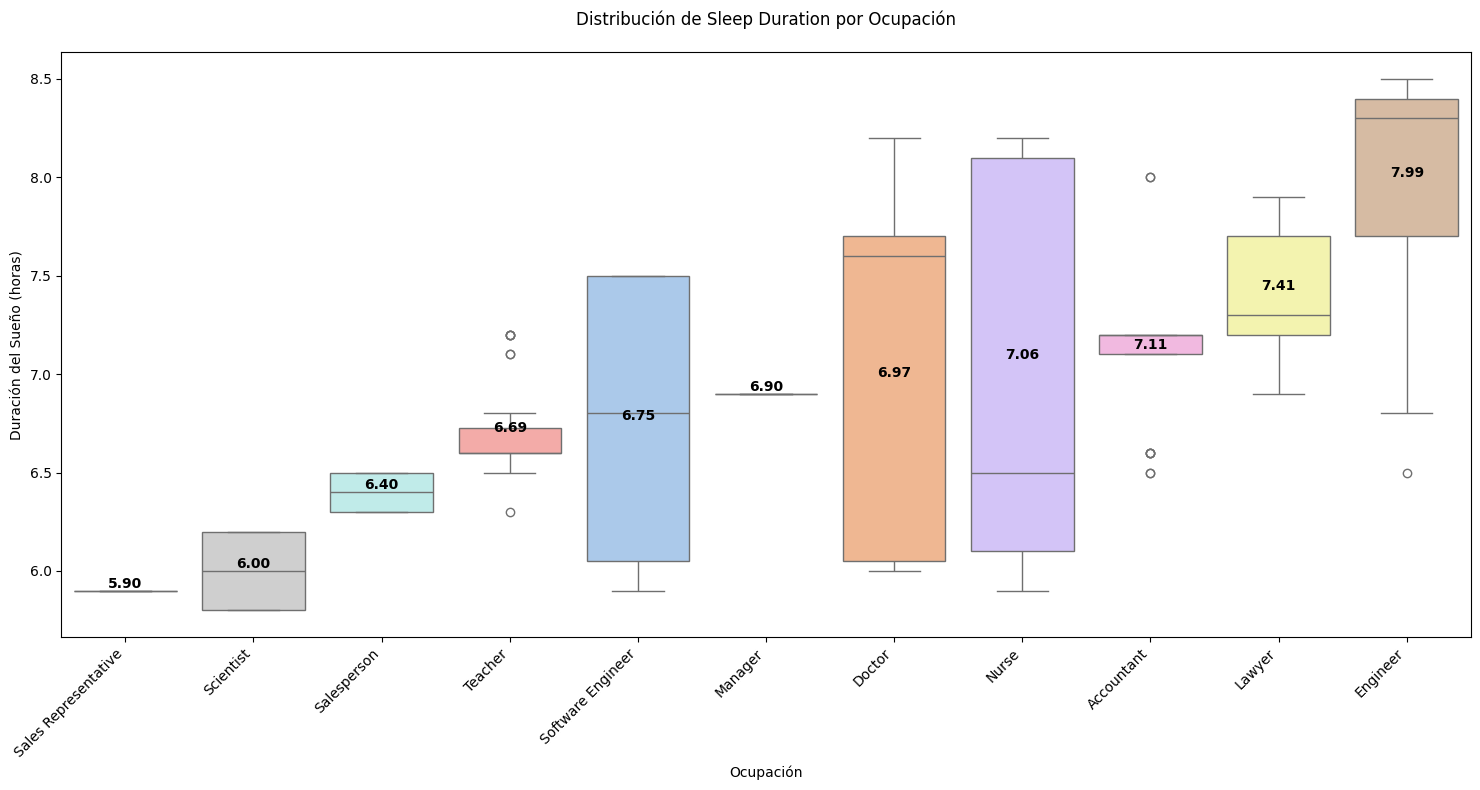

In [ ]:
# 2. Boxplot
# Calcular medias y ordenar ocupaciones
means = data.groupby('Occupation')['Sleep Duration'].mean().sort_values()
ordered_occupations = means.index.tolist()

# Crear figura más grande para acomodar todas las categorías
plt.figure(figsize=(15, 8))

# Crear boxplot con orden específico
box_plot = sns.boxplot(
    x='Occupation', 
    y='Sleep Duration', 
    data=data,
    hue='Occupation',
    palette='pastel',
    legend=False,
    order=ordered_occupations  # Añadir orden basado en medias
    )

# Rotar etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha='right')

# Añadir medias ordenadas
for i, occupation in enumerate(ordered_occupations):
    mean = means[occupation]
    box_plot.text(
        i, mean, f'{mean:.2f}', 
        horizontalalignment='center',
        verticalalignment='bottom',
        fontweight='bold'
        )

plt.title('Distribución de Sleep Duration por Ocupación', pad=20)
plt.xlabel('Ocupación')
plt.ylabel('Duración del Sueño (horas)')
plt.tight_layout()
plt.show()

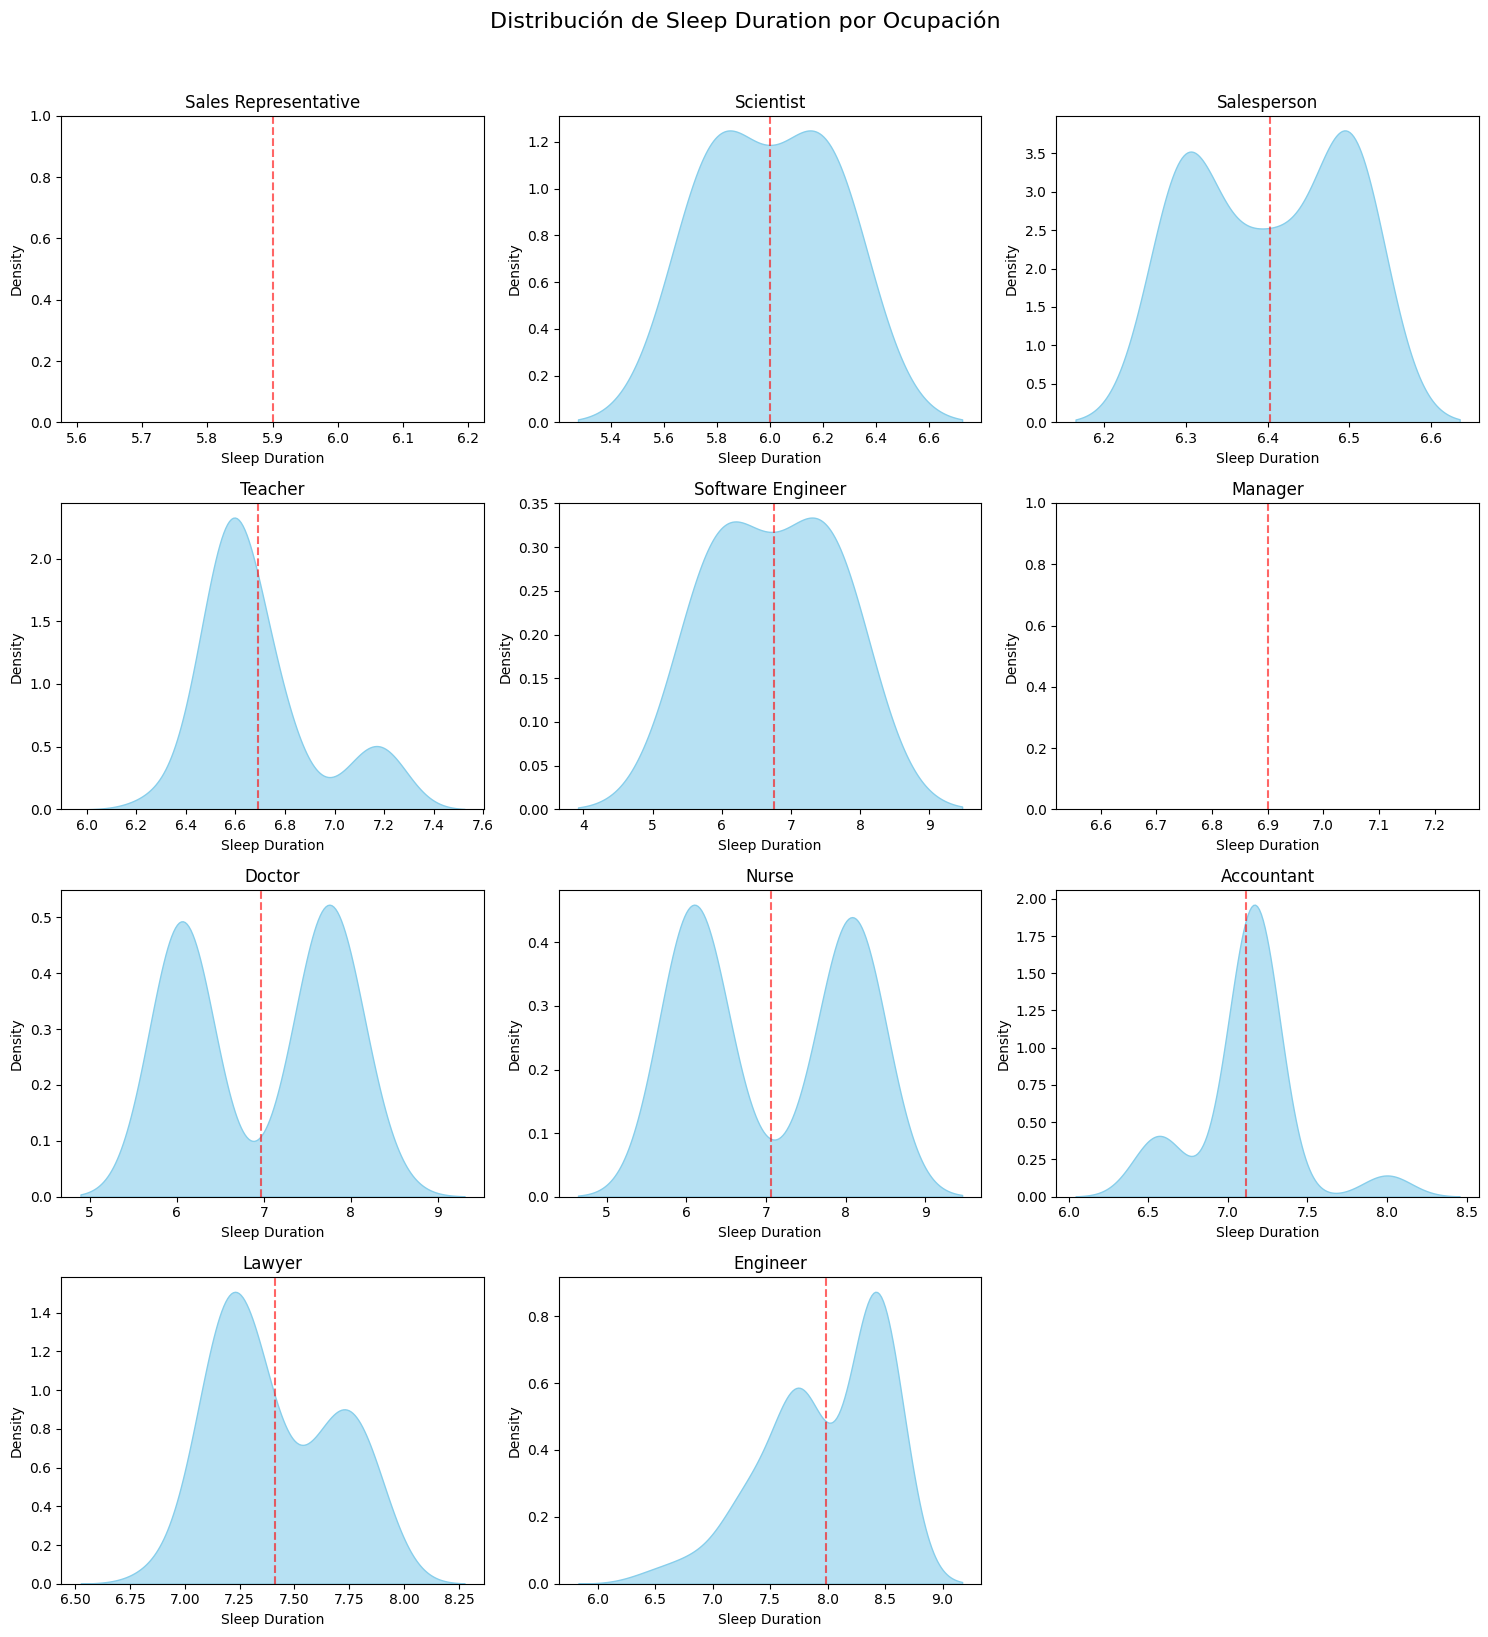

In [29]:
# 3. KDE
# Calcular el número de filas y columnas necesarias para el grid
n_occupations = len(data['Occupation'].unique())
n_cols = 3  # Podemos ajustar esto según preferencia
n_rows = (n_occupations + n_cols - 1) // n_cols

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()  # Convertir grid 2D en array 1D para facilitar iteración

# Ordenar ocupaciones por media de duración del sueño
means = data.groupby('Occupation')['Sleep Duration'].mean().sort_values()
ordered_occupations = means.index

# Crear un KDE plot para cada ocupación
for idx, occupation in enumerate(ordered_occupations):
    occupation_data = data[data['Occupation'] == occupation]
    
    sns.kdeplot(data=occupation_data,
                x='Sleep Duration',
                ax=axes[idx],
                fill=True,
                color='skyblue',
                alpha=0.6,
                warn_singular=False
                )
    
    # Añadir línea vertical para la media
    mean_val = occupation_data['Sleep Duration'].mean()
    axes[idx].axvline(x=mean_val, color='red', linestyle='--', alpha=0.6)
    
    # Personalizar cada subplot
    axes[idx].set_title(f'{occupation}')

# Ocultar subplots vacíos si los hay
for idx in range(len(ordered_occupations), len(axes)):
    axes[idx].set_visible(False)

# Ajustar layout
plt.suptitle('Distribución de Sleep Duration por Ocupación', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 4. ANOVA
occupations = data['Occupation'].unique()
sleep_by_occupation = [data[data['Occupation'] == occ]['Sleep Duration'] for occ in occupations]

f_stat, p_value = stats.f_oneway(*sleep_by_occupation)

print("\nResultados ANOVA:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")


Resultados ANOVA:
F-statistic: 20.6278
p-value: 0.0000


In [31]:
# 5. Test de Tukey HSD (Honestly Significant Difference)

# Preparar datos para Tukey
all_data = []
all_groups = []
for occ in occupations:
    sleep_data = data[data['Occupation'] == occ]['Sleep Duration']
    all_data.extend(sleep_data)
    all_groups.extend([occ] * len(sleep_data))

# Realizar test de Tukey
tukey_results = stats.tukey_hsd(all_data, all_groups)

# Crear una matriz de resultados
print("\nResultados Test de Tukey:")
print("Comparaciones significativas (p < 0.05):")
for i, occ1 in enumerate(occupations):
    for j, occ2 in enumerate(occupations):
        if i < j:  # Solo la mitad superior de la matriz
            idx = int((i * (len(occupations) - 1) - (i * (i-1)/2) + (j-i-1)))
            if tukey_results.pvalues[idx] < 0.05:
                diff = means[occ2] - means[occ1]
                print(f"{occ1} vs {occ2}:")
                print(f"    Diferencia de medias: {diff:.2f}")
                print(f"    p-value: {tukey_results.pvalues[idx]:.4f}")

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''